# <center>Rappel Pandas</center>

In [1]:
import pandas as pd
import numpy as np

## Fichiers nécessaires :

- data.tsv
- data.csv
- consommation_alcool_eleves.csv

## Chargement d'un tsv

In [2]:
data = pd.read_csv("data.tsv", sep='\t')

## Informations

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


## Description 

In [8]:
data.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


#### Arrondir les éléments de describe()

In [21]:
data.describe().round(2)

,order_id,quantity
count,4622.00,4622.00
mean,927.25,1.08
std,528.89,0.41
min,1.00,1.00
25%,477.25,1.00
50%,926.00,1.00
75%,1393.00,1.00
max,1834.00,15.00


#### Décrire juste une variable quantitative

In [24]:
data.quantity.describe().round()

count    4622.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max        15.0
Name: quantity, dtype: float64

## Nombre d'observation par champs

In [25]:
data.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

## Afficher le nombre de lignes

In [6]:
data.shape[0]

4622

## Afficher le nombre de colonnes

In [9]:
data.shape[1]

5

## Afficher le nom des colonnes

In [10]:
list(data.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

## Index

In [12]:
data.index

RangeIndex(start=0, stop=4622, step=1)

## Nombre d'articles 

In [17]:
total_items_orders = data.quantity.sum()
total_items_orders

4972

## Vérifier le type d'une variable

In [29]:
data.quantity.dtype

dtype('int64')

In [26]:
data.order_id.dtype

dtype('int64')

## Mesures statistiques

#### moyenne

In [30]:
data.quantity.mean()

1.0757247944612722

#### écart-type

In [31]:
data.quantity.std()

0.4101863342575426

#### variance

In [32]:
data.quantity.var()

0.16825282881164047

In [33]:
data.quantity.median()

1.0

In [34]:
data.quantity.quantile([.01, .1, .9, .99])

0.01    1.0
0.10    1.0
0.90    1.0
0.99    2.0
Name: quantity, dtype: float64

## Histogramme

<AxesSubplot:ylabel='Frequency'>

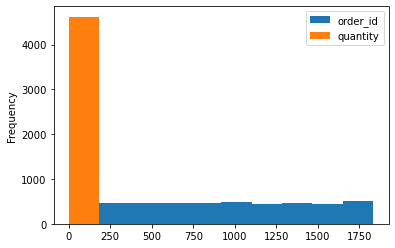

In [35]:
data.plot.hist()

<AxesSubplot:ylabel='Frequency'>

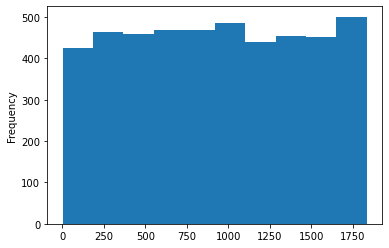

In [37]:
data.order_id.plot.hist()

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


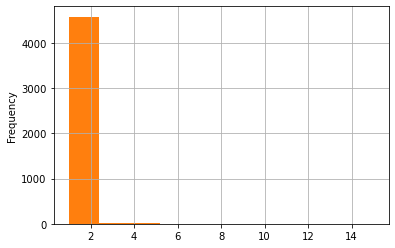

In [52]:
# histogramme avec grille
data.quantity.plot.hist()

# histogramme sans= grille
data.quantity.hist()

array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'quantity'}>]], dtype=object)

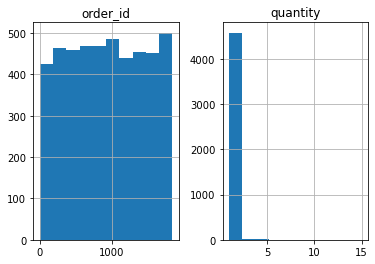

In [47]:
data.hist()

### Enlever la grille

array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'quantity'}>]], dtype=object)

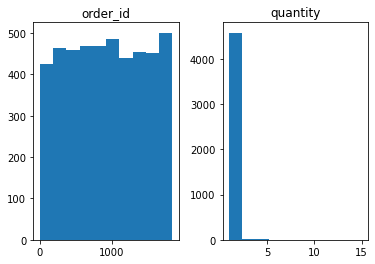

In [46]:
data.hist(grid = False)

## Boîte à moustache

<AxesSubplot:>

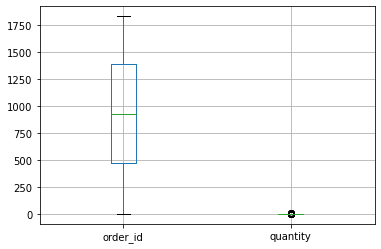

In [39]:
data.boxplot()

<AxesSubplot:>

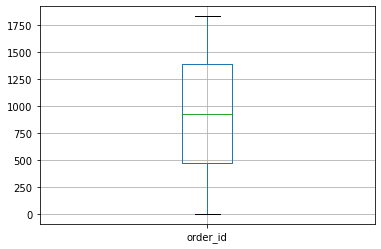

In [41]:
data.boxplot(column = "order_id")

<AxesSubplot:>

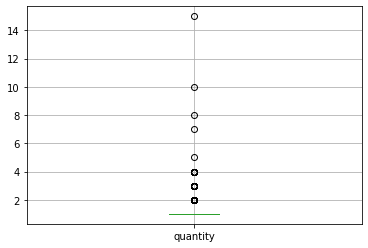

In [42]:
data.boxplot(column = "quantity")

### Enlever la grille

<AxesSubplot:>

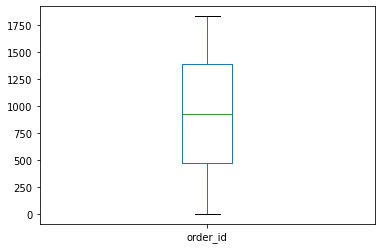

In [44]:
data.boxplot(column = "order_id", grid = False)

## Variables qualitatives

In [55]:
df = pd.read_csv("consommation_alcool_eleves.csv")

In [60]:
df.sex.describe()

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

In [61]:
df.sex.unique()

array(['F', 'M'], dtype=object)

In [62]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [64]:
pd.crosstab(df.sex, "freq")

col_0,freq
sex,
F,208
M,187


## Diagramme en barres

<AxesSubplot:xlabel='sex'>

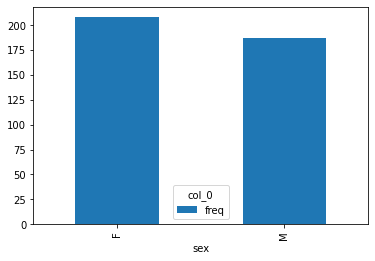

In [67]:
t = pd.crosstab(df.sex, "freq")
t.plot.bar()

## Diagramme circulaire

array([<AxesSubplot:ylabel='freq'>], dtype=object)

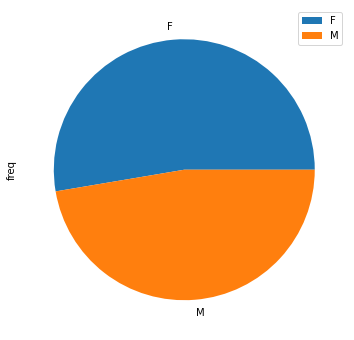

In [69]:
t = pd.crosstab(df.sex, "freq")
t.plot.pie(subplots=True, figsize = (6,6))

---

## Statistiques descriptives

### Calculer la corrélation entre les différentes variables du jeu de données.

In [71]:
data.corr()

,order_id,quantity
order_id,1.000000,0.032397
quantity,0.032397,1.000000


In [70]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


### Calculer la covariance

In [72]:
data.cov()

,order_id,quantity
order_id,279725.473656,7.028305
quantity,7.028305,0.168253


In [73]:
df.cov()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.628285,-0.228619,-0.226949,0.062873,-0.004434,0.231221,0.061717,0.020947,0.180364,0.149039,0.192733,-0.110326,1.789501,-0.271413,-0.688653,-0.944612
Medu,-0.228619,1.198445,0.742717,-0.131061,0.059667,-0.192681,-0.003842,0.033779,0.078115,0.019341,-0.066440,-0.071349,0.878622,0.746135,0.887509,1.089096
Fedu,-0.226949,0.742717,1.184180,-0.120073,-0.008379,-0.202641,-0.001337,-0.013963,0.052220,0.002313,-0.017702,0.022303,0.213134,0.687245,0.674953,0.760078
traveltime,0.062873,-0.131061,-0.120073,0.486513,-0.059070,0.047844,-0.010512,-0.011861,0.022162,0.085941,0.120478,0.007274,-0.072255,-0.215402,-0.401940,-0.374337
studytime,-0.004434,0.059667,-0.008379,-0.059070,0.704324,-0.108321,0.029898,-0.120041,-0.059706,-0.146533,-0.274304,-0.088228,-0.421127,0.447401,0.428947,0.376110
failures,0.231221,-0.192681,-0.202641,0.047844,-0.108321,0.553017,-0.029564,0.068329,0.103123,0.090118,0.135964,0.068059,0.379265,-0.875557,-0.995528,-1.227932
famrel,0.061717,-0.003842,-0.001337,-0.010512,0.029898,-0.029564,0.803997,0.134974,0.064454,-0.061974,-0.130952,0.117252,-0.318287,0.065977,-0.061659,0.211000
freetime,0.020947,0.033779,-0.013963,-0.011861,-0.120041,0.068329,0.134974,0.997725,0.316944,0.185954,0.190163,0.105173,-0.464274,0.041817,-0.051764,0.051745
goout,0.180364,0.078115,0.052220,0.022162,-0.059706,0.103123,0.064454,0.316944,1.239388,0.264763,0.602744,-0.014824,0.394718,-0.550967,-0.679438,-0.677292
Dalc,0.149039,0.019341,0.002313,0.085941,-0.146533,0.090118,-0.061974,0.185954,0.264763,0.793420,0.742852,0.095579,0.797758,-0.278385,-0.214836,-0.223061


### Calculer la corrélation entre deux variables du jeu de données.

In [74]:
df.age.corr(df.health)

-0.06218736851745007

### Calculer la covariance entre deux variables du jeu de données.

In [75]:
df.age.cov(df.health)

-0.1103257726659383

### Moyenne

In [81]:
# Afficher la moyenne des factures, pourboires et size groupée par sex
tips.groupby("sex").mean()

,Facture,Pourboire,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [84]:
# Afficher la moyenne des factures groupée par sex

tips.groupby("sex")["Facture"].mean()

sex
Female    18.056897
Male      20.744076
Name: Facture, dtype: float64

In [85]:
# Afficher la moyenne, l'écart-type, médiane, min et max de la variable facture groupés par sex
import numpy

tips.groupby("sex")["Facture"].agg([numpy.mean, numpy.std, numpy.median, numpy.min, numpy.max])

,mean,std,median,amin,amax
sex,,,,,
Female,18.056897,8.009209,16.40,3.07,44.30
Male,20.744076,9.246469,18.35,7.25,50.81


___

##  Nuage de points

In [76]:
tips = pd.read_csv("data.csv")

In [77]:
tips

,Facture,Pourboire,sex,Fumeur,Jour,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='Facture', ylabel='Pourboire'>

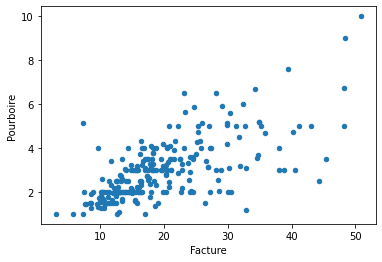

In [80]:
tips.plot.scatter("Facture", "Pourboire")

## Visualisations

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

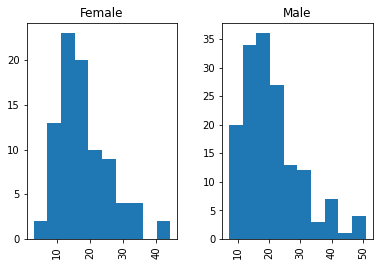

In [88]:
# Afficher les deux histogrammes de la variable facture selon le sex
tips.hist(column = "Facture", by = "sex")

array([[<AxesSubplot:title={'center':'Facture'}, xlabel='[sex]'>,
        <AxesSubplot:title={'center':'Pourboire'}, xlabel='[sex]'>],
       [<AxesSubplot:title={'center':'size'}, xlabel='[sex]'>,
        <AxesSubplot:>]], dtype=object)

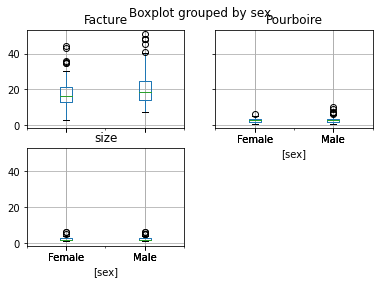

In [89]:
# Afficher les boites à moustache de toutes les variables (facture, pourboire, size) selon le sex

tips.boxplot(by = "sex")

<AxesSubplot:xlabel='sex'>

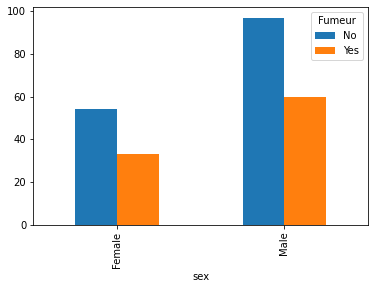

In [93]:
# Afficher le diagramme en barres du nombre des fumeurs et non fumeurs selon leur sex

t = pd.crosstab(tips.sex, tips.Fumeur)
t.plot.bar()

<AxesSubplot:xlabel='sex'>

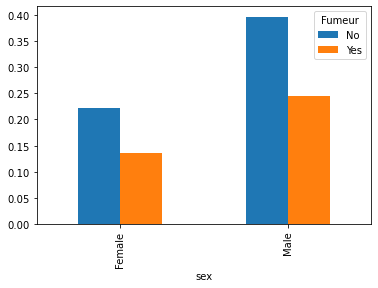

In [95]:
# Afficher le diagramme en barres du nombre des fumeurs et non fumeurs selon leur sex normalisé


t = pd.crosstab(tips.sex, tips.Fumeur, normalize=True)
t.plot.bar()